# Random Forest and One-Class SVM for Email Spam Classifier
This uses a spam e-mail database (binary classifier (spam or not spam)) and tests Random Forest vs One-Class SVM performance. 

In [11]:
import numpy as np
import csv
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt


In [12]:
###### Read in the data
raw=[]
with open('../data/spambase.data') as cf:
    readcsv = csv.reader(cf, delimiter=',')
    for row in readcsv:
        raw.append(row)       
data = np.array(raw).astype(np.float)

x = data[:, :-1]
y = data[:, -1]

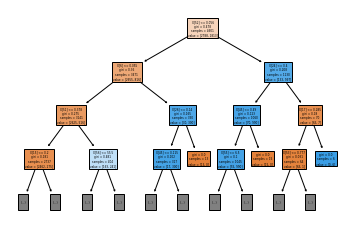

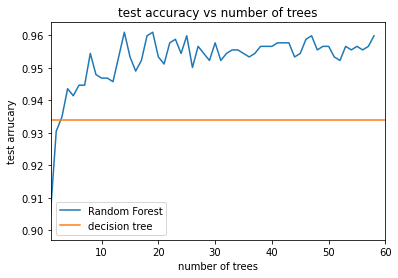

Accuracy for decision tree: 0.934
Accuracy for decision random forest: 0.961


In [13]:
# plot the tree##
ctree = tree.DecisionTreeClassifier().fit(x, y)
plt.figure() 
tree.plot_tree(ctree, max_depth=3, filled=True)
plt.show()

score_forest = []

# training both tree and forest with different number of trees
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
for ntree in range(1,60): 

    
    cforest = RandomForestClassifier(n_estimators=ntree, max_depth=20).fit(xtrain, ytrain)
    ypre_forest = cforest.predict(xtest)
    acc = np.float((ytest==ypre_forest).sum())/len(ytest)
    score_forest.append(acc)

ctree2 = tree.DecisionTreeClassifier(max_depth=20).fit(xtrain, ytrain)
ypre_tree = ctree2.predict(xtest)
acc2 = np.float((ytest==ypre_tree).sum())/len(ytest)
    
plt.figure()
plt.plot(score_forest, label='Random Forest')
plt.plot([1, 60],[acc2,acc2], label='decision tree')
plt.title("test accuracy vs number of trees")
plt.xlabel("number of trees")
plt.ylabel("test arrucary")
plt.xlim([1,60])
plt.legend()
plt.show()


print('Accuracy for decision tree: {:.3}'.format(acc2))
print('Accuracy for decision random forest: {:.3}'.format(max(score_forest)))


In [14]:
with open("../data/spambase.data", "r") as f:
    data = np.array([ [ float(d) for d in line.strip("\n").split(",") ] for line in f.readlines() ])

label = data[:, 57]
label = label*-2 +1

xtrain, xtest, ytrain, ytest = train_test_split(data[:, 0:57],label, test_size = 0.2)

idx_normal = np.array(np.where(ytrain==1)).reshape(-1)
xtrain_normal = xtrain[idx_normal, :]

mdl = OneClassSVM(gamma='auto').fit(xtrain_normal)

ypred = mdl.predict(xtest)
matched = ypred==ytest
acc = matched.sum()/len(matched)

print('The test error: {:.2%}'.format(1-acc))

The test error: 36.05%


# Analysis
From the graphs above, we can see that decicion tree performs about 92% accuracy whereas the random forest performs best at 95%. The random forest and tree both can change dependnet upon number of trees in the forest and also the depth of which they extend. Too much depth will lead to overfitting the data and the classic variance-bias tradeoff must be taken into consideration. 